In [1]:
import sys, os

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2
import json

In [3]:
sys.path.append('../')

In [4]:
from face_model import Face_3DMM
from util import *

In [5]:
id_dim, exp_dim, tex_dim, point_num = 100, 79, 100, 34650
face_proj = Face_3DMM('../3DMM',id_dim, exp_dim, tex_dim, point_num)

In [6]:
lands_info = np.loadtxt(os.path.join(
    '../3DMM', 'lands_info.txt'), dtype=np.int32)
lands_info = torch.as_tensor(lands_info).cuda()

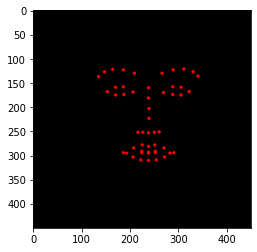

In [88]:
w = 450
h = 450
id_para = torch.zeros(1, id_dim).cuda()
exp_para = torch.zeros(1, exp_dim).cuda()
focal_length = torch.ones(1, ).cuda().float() * 15
trans = torch.zeros(1, 3).cuda().float()
euler_angle = torch.zeros(1, 3).cuda().float()
cxy = torch.tensor((w/2.0, h/2.0), dtype=torch.float).cuda()

with open('../face_3dmm_params/obama/0000.json') as f:
    trans_para_load = json.load(f)
with open('../face_3dmm_params/obama/0122.json') as f:
    exp_para_load = json.load(f)
with open('../face_3dmm_params/Mark_Zuck/static_params.json') as f:
    static_para_load = json.load(f)

focal_length = torch.Tensor(static_para_load['focal'])
focal_length = focal_length.cuda()

# id_para = torch.Tensor(static_para_load['id'])
# id_para = id_para.cuda()

# exp_para = torch.Tensor(exp_para_load['exp'])
# exp_para = exp_para.unsqueeze(0).cuda()

trans = torch.Tensor(trans_para_load['trans'])
trans = trans.unsqueeze(0).cuda()

# euler = torch.Tensor(exp_para_load['euler'])
# euler = euler.unsqueeze(0).cuda()


geometry = face_proj.forward_geo_sub(
            id_para, exp_para, lands_info[-51:].long())
proj_geo = forward_transform(
            geometry, euler_angle, trans, focal_length, cxy)

landmarks = proj_geo.squeeze().cpu().numpy()
canvas = np.zeros((450, 450, 3), dtype=np.uint8)
for i in range(landmarks.shape[0]):
    cv2.circle(canvas, (int(landmarks[i, 0]), int(landmarks[i, 1])), radius=2, color=(255, 0, 0), thickness=2)
plt.imshow(canvas)

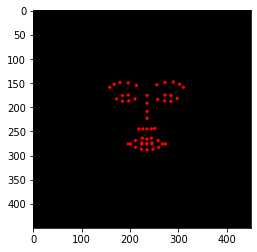

In [87]:
w = 450
h = 450
id_para = torch.zeros(1, id_dim).cuda()
exp_para = torch.zeros(1, exp_dim).cuda()
focal_length = torch.ones(1, ).cuda().float() * 15
trans = torch.zeros(1, 3).cuda().float()
euler_angle = torch.zeros(1, 3).cuda().float()
cxy = torch.tensor((w/2.0, h/2.0), dtype=torch.float).cuda()

with open('../face_3dmm_params/obama/0000.json') as f:
    trans_para_load = json.load(f)
with open('../face_3dmm_params/obama/0122.json') as f:
    exp_para_load = json.load(f)
with open('../face_3dmm_params/obama/static_params.json') as f:
    static_para_load = json.load(f)

focal_length = torch.Tensor(static_para_load['focal'])
focal_length = focal_length.cuda()

# id_para = torch.Tensor(static_para_load['id'])
# id_para = id_para.cuda()

# exp_para = torch.Tensor(exp_para_load['exp'])
# exp_para = exp_para.unsqueeze(0).cuda()

trans = torch.Tensor(trans_para_load['trans'])
trans = trans.unsqueeze(0).cuda()

# euler = torch.Tensor(exp_para_load['euler'])
# euler = euler.unsqueeze(0).cuda()


geometry = face_proj.forward_geo_sub(
            id_para, exp_para, lands_info[-51:].long())
proj_geo = forward_transform(
            geometry, euler_angle, trans, focal_length, cxy)

landmarks = proj_geo.squeeze().cpu().numpy()
canvas = np.zeros((450, 450, 3), dtype=np.uint8)
for i in range(landmarks.shape[0]):
    cv2.circle(canvas, (int(landmarks[i, 0]), int(landmarks[i, 1])), radius=2, color=(255, 0, 0), thickness=2)
plt.imshow(canvas)

In [75]:
w = 450
h = 450
id_para = torch.zeros(1, id_dim).cuda()
exp_para = torch.zeros(1, exp_dim).cuda()
focal_length = torch.ones(1, ).cuda().float() * 15
trans = torch.zeros(1, 3).cuda().float()
euler_angle = torch.zeros(1, 3).cuda().float()
cxy = torch.tensor((w/2.0, h/2.0), dtype=torch.float).cuda()

with open('../face_3dmm_params/obama/0000.json') as f:
    trans_para_load = json.load(f)
with open('../face_3dmm_params/Mark_Zuck/static_params.json') as f:
    static_para_load = json.load(f)
focal_length = torch.Tensor(static_para_load['focal'])
focal_length = focal_length.cuda()

# id_para = torch.Tensor(static_para_load['id'])
# id_para = id_para.cuda()
landmarks_collection = []
for i in range(11000):
    face_path = '../face_3dmm_params/obama/{:04d}.json'.format(i)
    with open(face_path) as f:
        exp_para_load = json.load(f)

    exp_para = torch.Tensor(exp_para_load['exp'])
    exp_para = exp_para.unsqueeze(0).cuda()

    trans = torch.Tensor(trans_para_load['trans'])
    trans = trans.unsqueeze(0).cuda()

    # euler = torch.Tensor(exp_para_load['euler'])
    # euler = euler.unsqueeze(0).cuda()

    geometry = face_proj.forward_geo_sub(
                id_para, exp_para, lands_info[-51:].long())
    proj_geo = forward_transform(
                geometry, euler_angle, trans, focal_length, cxy)

    landmarks = proj_geo.squeeze().cpu().numpy()
    landmarks_collection.append(landmarks)
# canvas = np.zeros((450, 450, 3), dtype=np.uint8)
# for i in range(landmarks.shape[0]):
#     cv2.circle(canvas, (int(landmarks[i, 0]), int(landmarks[i, 1])), radius=2, color=(255, 0, 0), thickness=2)
# plt.imshow(canvas)

In [ ]:
w = 450
h = 450
id_para = torch.zeros(1, id_dim).cuda()
exp_para = torch.zeros(1, exp_dim).cuda()
focal_length = torch.ones(1, ).cuda().float() * 15
trans = torch.zeros(1, 3).cuda().float()
euler_angle = torch.zeros(1, 3).cuda().float()
cxy = torch.tensor((w/2.0, h/2.0), dtype=torch.float).cuda()

with open('../face_3dmm_params/obama/0000.json') as f:
    trans_para_load = json.load(f)
with open('../face_3dmm_params/Mark_Zuck/static_params.json') as f:
    static_para_load = json.load(f)
focal_length = torch.Tensor(static_para_load['focal'])
focal_length = focal_length.cuda()

# id_para = torch.Tensor(static_para_load['id'])
# id_para = id_para.cuda()
landmarks_collection = []
for i in range(11000):
    face_path = '../face_3dmm_params/obama/{:04d}.json'.format(i)
    with open(face_path) as f:
        exp_para_load = json.load(f)

    exp_para = torch.Tensor(exp_para_load['exp'])
    exp_para = exp_para.unsqueeze(0).cuda()

    # trans = torch.Tensor(trans_para_load['trans'])
    # trans = trans.unsqueeze(0).cuda()

    # euler = torch.Tensor(exp_para_load['euler'])
    # euler = euler.unsqueeze(0).cuda()

    geometry = face_proj.forward_geo_sub(
                id_para, exp_para, lands_info[-51:].long())
    proj_geo = forward_transform(
                geometry, euler_angle, trans, focal_length, cxy)

    landmarks = proj_geo.squeeze().cpu().numpy()
    landmarks_collection.append(landmarks)
# canvas = np.zeros((450, 450, 3), dtype=np.uint8)
# for i in range(landmarks.shape[0]):
#     cv2.circle(canvas, (int(landmarks[i, 0]), int(landmarks[i, 1])), radius=2, color=(255, 0, 0), thickness=2)
# plt.imshow(canvas)

In [79]:
landmarks_collection = np.array(landmarks_collection)

In [80]:
landmarks_collection.shape

(11000, 51, 3)

In [76]:
len(landmarks_collection)

11000

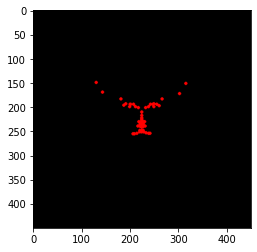

In [11]:
plt.imshow(canvas)

In [27]:
geometry[0, :30]

tensor([[-5.4063e+01,  4.5986e+01,  9.0701e+00],
        [-4.7290e+01,  5.0234e+01,  1.6517e+01],
        [-3.8326e+01,  5.2562e+01,  2.2876e+01],
        [-2.6574e+01,  5.1430e+01,  2.8598e+01],
        [-1.4590e+01,  4.7781e+01,  3.0956e+01],
        [ 1.4202e+01,  4.7971e+01,  3.0921e+01],
        [ 2.6195e+01,  5.1724e+01,  2.8471e+01],
        [ 3.8037e+01,  5.2929e+01,  2.2640e+01],
        [ 4.7986e+01,  5.0319e+01,  1.5610e+01],
        [ 5.4008e+01,  4.6289e+01,  8.9132e+00],
        [ 7.7692e-02,  3.2728e+01,  3.2014e+01],
        [ 8.7069e-02,  2.1785e+01,  3.9785e+01],
        [ 1.9220e-01,  1.0270e+01,  4.8410e+01],
        [ 2.2327e-01,  2.8703e-01,  5.4387e+01],
        [-1.1410e+01, -1.4234e+01,  3.1614e+01],
        [-6.1606e+00, -1.4300e+01,  3.6888e+01],
        [ 4.6248e-02, -1.4563e+01,  3.8953e+01],
        [ 6.1906e+00, -1.4306e+01,  3.6882e+01],
        [ 1.1341e+01, -1.4149e+01,  3.1565e+01],
        [-4.4414e+01,  2.9456e+01,  8.8531e+00],
        [-3.5384e+01